# Books EDA and recommendation system

Finding a dataset with reasonnable size and data about user is not common. It's why I have chosen the data at https://www.kaggle.com/datasets/saurabhbagchi/books-dataset.
A said in the Acknowledgements part of this page, the data was collected by Cai-Nicolas Ziegler in 2004. The original links is http://www2.informatik.uni-freiburg.de/~cziegler/BX/.
The data is a litle old but it provides a good dataset for training. The usability score on Kaggle is 10.0 which is the maximum. Other datasets with user ratings were too voluminous like https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m and https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset, the usability was bad or the source was not provided.
The dataset contains 278 858 anonymized users with demographic information providing 1 149 780 ratings about 271 379 books.

This notebook is divided in two parts. The first is an EDA about the books and teh second is a recommendations system. 

## Setup the environment

An environment was created for this project. The python version is 3.10.8 as seen below

In [94]:
!echo %CONDA_DEFAULT_ENV%

%CONDA_DEFAULT_ENV%


In [95]:
!python --version

Python 3.9.12


In [96]:
!pip show pandas

Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\adrie\outils_dev\anaconda\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, statsmodels, seaborn, hvplot, holoviews, datashader, cufflinks


To use linear algebra we import numpy and to process the data we import pandas

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing

To get and manipulate file, we import the os package

In [98]:
import os

To visualize data we install an import matplotlib and to improv visualization we use seaborn

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [181]:
!pip install wordcloud

## Loading and cleaning the data

In [100]:
#path and file name
#files_path="D:/Workspace_Python/MLProject/dataset/books_data/"
files_path="C:/Users/adrie/Workspace_Python/dataset/books_data/"
books_csv="books.csv"
users_csv="users.csv"
ratings_csv="ratings.csv"

In [101]:
books = pd.read_csv(files_path+books_csv, sep=";",on_bad_lines='warn', encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 
                 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\4244541532.py:1: DtypeWar

As we can see, some lines were skipped because they have too many fields. We should see if this data can be cleanned so we can used them. As we doesn't have many rows in error and the files are readable with tools like Notepad++ or Excel, we can do it manually. If it wasn't the case we should have wrote a custom reader to store the line in error.
When looking at the file we can see the presence of "&amp;" string which can create unexpected columns du to the semicolon. To correct that, we remplace "&amp;"  by "&"
By rerunning the read_csv function, we still have some errors:

Skipping line 43667: expected 8 fields, saw 10

Skipping line 144058: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 10
Skipping line 261529: expected 8 fields, saw 9

Again this result of title containing both " \" " and " ; ". As we have only 6 rows affected, we correct them manually by replacing " \" " by " ' " then " ; " by " , " if necessary.
Rerunning the above cell and check if all lines are loaded:

In [102]:
books.shape

(271360, 8)

The number of rows and columns in the dataFram is the same than the file, so far so good.
We can now explore the data

## Search of inconsistency in the data

### Cleaning of the books dataset

In [103]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


We observe that the three last columns are URL of image so we can discard them as they don't contain useful data as we don't need to load image only print the title of the book to give recommentation (altough it could be useful for an web application, so in that case we would have kept those columns)

In [104]:
books=books.drop(['imageUrlS','imageUrlM','imageUrlL'], axis=1)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


The dataframe has 5 columns remaining. The ISBN allow to uniquely identify each book.
The column yearOfPublication should contain only year and be convertible to integer. We check if it's the case

In [105]:
books["yearOfPublication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We observe that some date are instead publishers. We retrieve this observations:

In [106]:
bad_rows=books[(books["yearOfPublication"]=='DK Publishing Inc') | (books["yearOfPublication"] == 'Gallimard')]
bad_rows

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


The book title seems to contain the book author. We clean this rows.

In [107]:
bad_rows[['realBookTitle','realBookAuthor']]=bad_rows.bookTitle.str.split('\\\\";',expand=True)
bad_rows

C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\1544933059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows[['realBookTitle','realBookAuthor']]=bad_rows.bookTitle.str.split('\\\\";',expand=True)
C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\1544933059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows[['realBookTitle','realBookAuthor']]=bad_rows.bookTitle.str.split('\\\\";',expand=True)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,realBookTitle,realBookAuthor
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum"""
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,"Peuple du ciel, suivi de 'Les Bergers","Jean-Marie Gustave Le ClÃ?Â©zio"""
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley"""


In [108]:
lst=[]
for i in bad_rows.index:
    lst.append(i)
    books.loc[i,"publisher"]=bad_rows.loc[i,"yearOfPublication"]
    books.loc[i,"yearOfPublication"]=bad_rows.loc[i,"bookAuthor"]
    books.loc[i,"bookAuthor"]=bad_rows.loc[i,"realBookAuthor"]
    books.loc[i,"bookTitle"]=bad_rows.loc[i,"realBookTitle"]
books.loc[lst]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum""",2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers","Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley""",2000,DK Publishing Inc


In [109]:
books["bookAuthor"]=books["bookAuthor"].str.replace('"',"'")

In [110]:
books["bookAuthor"]=books["bookAuthor"].str.replace(r'\\',"")

C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\1141391955.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  books["bookAuthor"]=books["bookAuthor"].str.replace(r'\\',"")


Some rows has quote or double quote at the end of bookAuthor or bookTitle that doesn't close another quote. We remove them.

In [111]:
books[books["bookAuthor"].str.endswith("'",na=False) & books["bookAuthor"].str.count("'")%2==1]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
98284,0416652700,The Pooh cook book: inspired by \Winnie-the-Po...,;Katie Stewart',1971,Methuen
112275,1853114103,Lord Have Mercy,'Ron'',2001,Canterbury Press
117990,0786881364,A Simple Program : A Contemporary Translation ...,J 'j'',1996,Hyperion
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum',2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio',2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley',2000,DK Publishing Inc
223748,1895455243,Finger Food (Company's Coming Pint Size),Jean Pare',1993,Company's Coming Publishing
245712,0961364920,A Timeless Place: Lett's Set a Spell at the Co...,Sandra 'Sandy Lynn' Lett',2001,Transformations


In [112]:
condition=books["bookAuthor"].str.endswith("'",na=False) & books["bookAuthor"].str.count("'")%2==1
books.loc[condition,"bookAuthor"]=books.loc[condition,"bookAuthor"].str.rstrip("'")

In [113]:
books[books["bookAuthor"].str.endswith('"',na=False) & books["bookAuthor"].str.count('"')%2==1]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [114]:
condition=books["bookTitle"].str.endswith("'",na=False) & books["bookTitle"].str.count("'")%2==1
books.loc[condition,"bookTitle"]

9344      The Way You Wear Your Hat: Frank Sinatra and t...
11310                             All over but the Shoutin'
18281                                           Dottor Niu'
24168                                You Gotta Keep Dancin'
43365                             All over but the Shoutin'
57503                             All Over but the Shoutin'
63725     The Way You Wear Your Hat: Frank Sinatra and t...
70937                                      Love Everlastin'
103817                                          Everlastin'
113802    Kevin Myers: From the Irish Times Column 'an I...
117511        Charles Darwin's 'The Life of Erasmus Darwin'
120234                                      Cause cÃ?Â©leb'
133461                                    Like I Was Sayin'
140445                    Garri Potter i filosofskii kamen'
155279                                       Freaky Dancin'
182923                            All Over but the Shoutin'
193698                                 F

In [115]:
books.loc[condition,"bookTitle"]=books.loc[condition,"bookTitle"].str.rstrip("'")

In [116]:
books.loc[condition,"bookTitle"]

9344      The Way You Wear Your Hat: Frank Sinatra and t...
11310                              All over but the Shoutin
18281                                            Dottor Niu
24168                                 You Gotta Keep Dancin
43365                              All over but the Shoutin
57503                              All Over but the Shoutin
63725     The Way You Wear Your Hat: Frank Sinatra and t...
70937                                       Love Everlastin
103817                                           Everlastin
113802    Kevin Myers: From the Irish Times Column 'an I...
117511         Charles Darwin's 'The Life of Erasmus Darwin
120234                                       Cause cÃ?Â©leb
133461                                     Like I Was Sayin
140445                     Garri Potter i filosofskii kamen
155279                                        Freaky Dancin
182923                             All Over but the Shoutin
193698                                  

In [117]:
condition=books["bookTitle"].str.endswith('"',na=False) & books["bookTitle"].str.count('"')%2==1
books.loc[condition,"bookTitle"]=books.loc[condition,"bookTitle"].str.rstrip("'")

In [118]:
books["bookTitle"]=books["bookTitle"].str.replace(r'\\',"")

C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\3008223896.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  books["bookTitle"]=books["bookTitle"].str.replace(r'\\',"")


We transform the year in integer to better handle them

In [119]:
books.yearOfPublication=books.yearOfPublication.astype("int")

In [120]:
print(sorted(books.yearOfPublication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


We observe a discontinuity in the year of publication after 2008. Also the dataset was made in summer 2004 so all books after 2005 are probably placeholder or data error. We replace the year of publication of this books with the mean after setting the value at nan so this rows doesn't affect the statistics of our data. The books of 2005 have good probability to be accurate as a planned publication to one year is common so we don't modify them but this can be discuss.

In [121]:
books.loc[(books.yearOfPublication==0)|(books.yearOfPublication>2005) ,'yearOfPublication' ] = np.nan
books.yearOfPublication = books.yearOfPublication.fillna(round(books.yearOfPublication.mean()))

We check the presence of null value in the dataFrame

In [122]:
books[books.yearOfPublication.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [123]:
books[books.bookTitle.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [124]:
books[books.bookAuthor.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


Based oon the book title and the publisher, the author of the book seems to be Sophie Pyott, Larissa Anne Downe or both as the data are not the same on google books and goodread also the ISBN is not the same and for the same ISBN the bookAuthor is really NaN. In doubt we choose to not update this row. 

In [125]:
books[books.publisher.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


The publisher can be find by searching the ISBN on online database (isbnsearch.org, amazon.com or google books) and filter by the year of publication. We find that this two books were publisher by
Novelbooks Incorporated. We update this two rows with the found value.

In [126]:
books.loc[books.ISBN=='193169656X','publisher']='Novelbooks Incorporated'
books.loc[books.ISBN=='1931696993','publisher']='Novelbooks Incorporated'

In [127]:
books[books.ISBN.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


Only the columns bookAuthor and publisher have null value and very few. We decide to keep them as the information in these rows can still be useful. We always could delete them later.

### Cleaning of the users dataset

In [128]:
users = pd.read_csv(files_path+users_csv, sep=';', on_bad_lines='warn', encoding="latin-1",
                   dtype={'Age':'Int32'})
users.columns = ['userID', 'Location', 'Age']

In [129]:
users[ (users.Age>99) | (users.Age<5) ].count()[0] 
#118 is the age of the oldest person nowadays, 5 is the regular age where children learn to read

1255

They are 960 users which have incoherent or irrelevant age. We update this values with nan value

In [130]:
users.loc[ (users.Age>99) | (users.Age<5), 'Age'] = np.nan

We update the nan age value with the average age.

In [131]:
users.Age = users.Age.fillna(round(users.Age.mean()))

In [132]:
users.dtypes

userID       int64
Location    object
Age          Int32
dtype: object

The column types are good so we change nothing.

In [133]:
users[users.Location.str.contains('"')]

,userID,Location,Age
267,268,"århus, \n/a\"", denmark""",35
1102,1103,"kuala lumpur, \n/a\"", malaysia""",35
1272,1273,"valladolid, \n/a\"", spain""",27
1305,1306,"lisbon, \n/a\"",""",41
1694,1695,"london, \n/a\"", united kingdom""",69
...,...,...,...
277747,277748,"rimini, \n/a\"", italy""",35
277859,277860,"barcelona, \n/a\"", spain""",25
278137,278138,"oviedo, \n/a\"", spain""",49
278342,278343,"växjö, \n/a\"", sweden""",35


We can do the same operation done for books

In [134]:
users["Location"]=users["Location"].str.replace('"',"'")
users["Location"]=users["Location"].str.replace(r'\\',"")

C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\1594432378.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  users["Location"]=users["Location"].str.replace(r'\\',"")


In [135]:
users["Location"]=users["Location"].str.replace("n/a'","n/a")
users["Location"]=users["Location"].str.replace("'n/a","n/a")

In [136]:
condition=users["Location"].str.endswith("'",na=False) & users["Location"].str.count("'")%2==1
users.loc[condition,"Location"]=users.loc[condition,"Location"].str.rstrip("'")

In [137]:
users[users.Location.str.contains("'")].sort_values(by="Location")

,userID,Location,Age
244250,244251,"alexandria'., 'alexandria'., egypt'",44
80169,80170,"athens, ano liosia', greece'",16
10276,10277,"düsseldorf, na', germany'",35
158161,158162,"holbæk, n/j', denmark'",35
119745,119746,"kartoum, n/s', sudan'",28
69341,69342,"kocaeli, na'., turkey'",35
197600,197601,"ljubljana, na', slovenia'",35
72128,72129,"lleida, catalunya', spain'",21
72592,72593,"lujan de cuyo, mendoza/argentina', argentina'",25
252668,252669,"manchester, na', united kingdom'",35


We observe we can remove all the remaining quote in the column Location as all are irrelevant.

In [138]:
users["Location"]=users["Location"].str.replace("'","")

In [139]:
users[users.Location.str.contains("'")]

,userID,Location,Age


Now that the bad characters are cleaned, we can divide the column Location in 3 new columns 'city', state and country.

In [140]:
users.loc[users["Location"].str.count(",")>2]

,userID,Location,Age
435,436,"ivanhoe, melbourne, victoria, australia",53
814,815,"davis bay, sechelt, british columbia, canada",43
840,841,"saint charles, mo, missouri, usa",24
956,957,"santiago, santiago,metropolitana, chile",35
1459,1460,"mansoura, dakahlia, mansoura, egypt",34
...,...,...,...
277717,277718,"colorado springs, co 80901, colorado, usa",62
277753,277754,"north bend,, oregon, usa",60
278028,278029,"mansfield, nottinghamshire, england, united ki...",31
278214,278215,"nelson, motueka, nz, new zealand",28


1508 rows have incorrect location. The error is the city part. A regular split cant' be done if we dont what loose information, particularly the country.

In [141]:
users["city"]=users.apply(lambda row: row["Location"].split(',')[0],axis=1)
users["state"]=users.apply(lambda row: 
                           row["Location"][row["Location"].find(','):row["Location"].rfind(',')],axis=1)
users["country"]=users.apply(lambda row: row["Location"].split(',')[-1],axis=1)

In [142]:
users["state"]=users["state"].str.removeprefix(", ")
users["state"]=users["state"].str.removeprefix(",")
users["state"]=users["state"].str.removeprefix(" ")
users["city"]=users["city"].str.strip(" ")
users["country"]=users["country"].str.strip(" ")
users.loc[users["state"].str.contains(",")]

,userID,Location,Age,city,state,country
435,436,"ivanhoe, melbourne, victoria, australia",53,ivanhoe,"melbourne, victoria",australia
814,815,"davis bay, sechelt, british columbia, canada",43,davis bay,"sechelt, british columbia",canada
840,841,"saint charles, mo, missouri, usa",24,saint charles,"mo, missouri",usa
956,957,"santiago, santiago,metropolitana, chile",35,santiago,"santiago,metropolitana",chile
1459,1460,"mansoura, dakahlia, mansoura, egypt",34,mansoura,"dakahlia, mansoura",egypt
...,...,...,...,...,...,...
277717,277718,"colorado springs, co 80901, colorado, usa",62,colorado springs,"co 80901, colorado",usa
277753,277754,"north bend,, oregon, usa",60,north bend,", oregon",usa
278028,278029,"mansfield, nottinghamshire, england, united ki...",31,mansfield,"nottinghamshire, england",united kingdom
278214,278215,"nelson, motueka, nz, new zealand",28,nelson,"motueka, nz",new zealand


The state column is ambigus as some countries have specific mapping so the above output is acceptable

In [143]:
users=users.drop("Location", axis=1)
users.head()

,userID,Age,city,state,country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


The users datafram is now clean, we apply the same process to the ratings dataset

### Cleaning the ratings dataset

In [144]:
ratings = pd.read_csv(files_path+ratings_csv, sep=';',  on_bad_lines='warn', encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [145]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [146]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

The bookRating column has value between 0 and 10 as expected so nothing to do with this column

In [147]:
[print("userID as na value") if ratings[ratings[x].isna()].shape[0]!=0 else print(f"all good for {x}")  for x in ratings.columns] 

all good for userID
all good for ISBN
all good for bookRating


[None, None, None]

None of the columns have na value

In [148]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

All userID are integers so they aren't format problem for this feature

In [149]:
condition=(ratings["ISBN"].str.contains('"') ) | (ratings["ISBN"].str.contains(r'\\') ) 
bad_isbn=ratings.loc[condition]
bad_isbn

,userID,ISBN,bookRating
21687,4377,"\0210000010""",8
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
183260,39821,"\0432534220\""""",6
210091,48821,"\8804501367\""""",0
531936,128375,"\2842053052\""""",0
663235,160867,"\0094749809""",7
824820,199138,"\0432534220\""""",8
877347,212647,"\8804520159\""""",7
941677,227945,"\9170010242\""""",10


As for the previous dataset, we observe error of quoting on some observation. They still represente accurate data hence we choose to clean them in order to keep them.

In [150]:
bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('"',"")
bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('\\',"",regex=True)
bad_isbn

C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\2125878562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('"',"")
C:\Users\adrie\AppData\Local\Temp\ipykernel_1812\2125878562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('\\',"",regex=True)


,userID,ISBN,bookRating
21687,4377,0210000010,8
45327,11676,0432534220,6
45328,11676,2842053052,7
183260,39821,0432534220,6
210091,48821,8804501367,0
531936,128375,2842053052,0
663235,160867,0094749809,7
824820,199138,0432534220,8
877347,212647,8804520159,7
941677,227945,9170010242,10


In [151]:
ratings.update(bad_isbn)

In [152]:
condition=(ratings["ISBN"].str.contains('"') ) | (ratings["ISBN"].str.contains(r'\\') ) 
ratings[condition]

,userID,ISBN,bookRating


All data are now cleaned. We pass to the analysis part.

## EDA

In [153]:
round(users.Age.mean())

35

The average age of the user is approximatively 35.

We merge the three dataframes by using userID and ISBN as key. This remove books that haven't been read by users.

In [170]:
df = pd.merge(users, ratings, on='userID')
df = pd.merge(df, books, on='ISBN')

The distribution of ratings is:

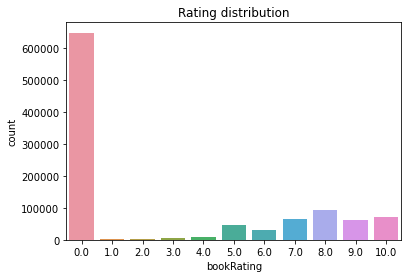

In [173]:
sns.countplot(x="bookRating",data=df)
plt.title("Rating distribution")
plt.show()

We observe that the number of books rated 0 are really high. All those books are mainly books not rated as 0 is the implicit rating. Also those books will not be used for a recommmendation system as we dont have others features

In [175]:
df_ratings=df[["bookRating"]].copy()
df_ratings=df_ratings[df_ratings["bookRating"]!=0]

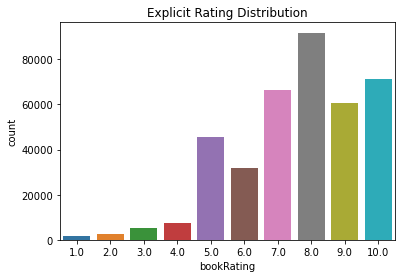

In [176]:
sns.countplot(x="bookRating", data=df_ratings)
plt.title("Explicit Rating Distribution")
plt.show()

Few books have less than 5 and 8 is the most represented rating so most user are happy with their books. I should also be easy to recommend good books to one user based on the liking of the others

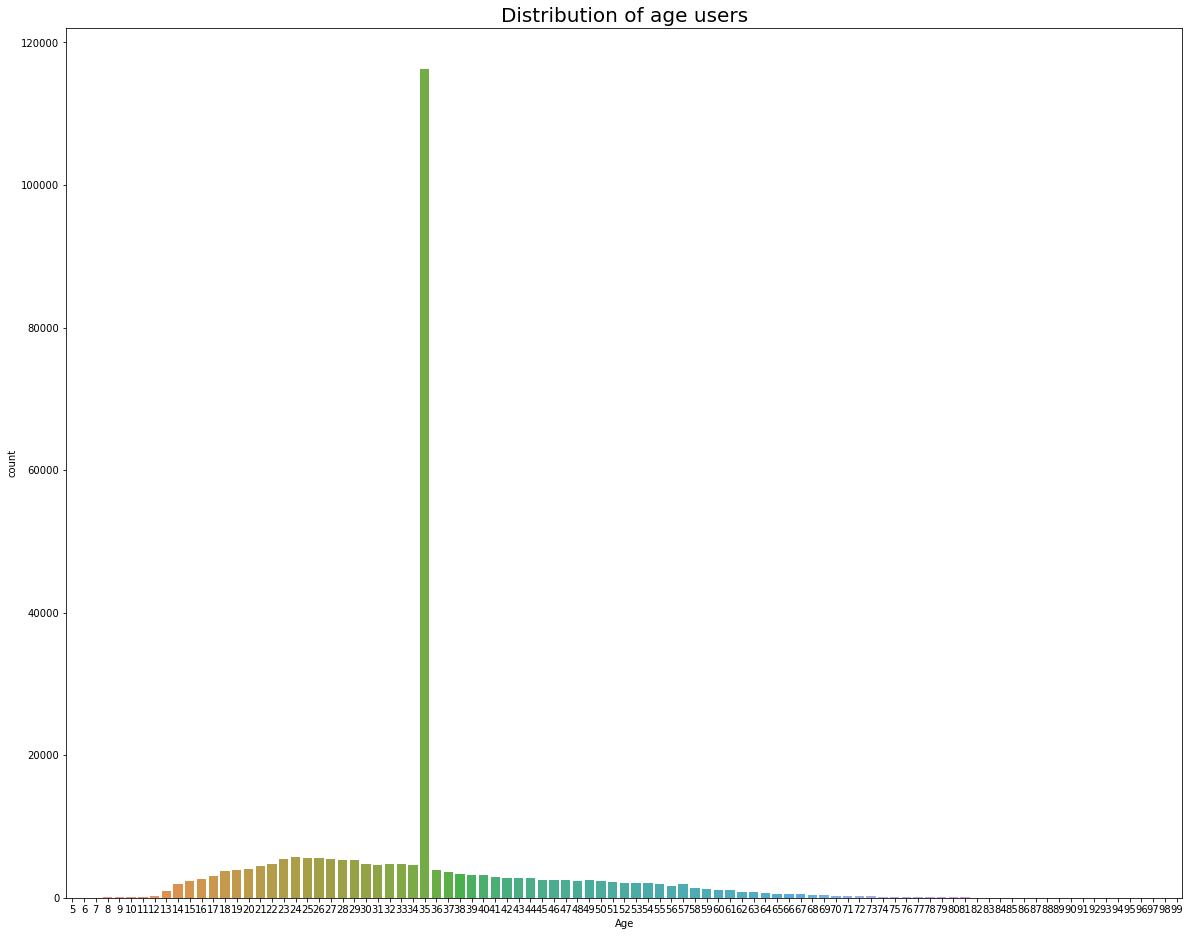

In [180]:
plt.figure(figsize=(20,16))
sns.countplot(x="Age", data=users)
plt.title("Distribution of age users", size=20)
plt.show()

We observe a pic at 35 wich is logical as we have replaced all na and extremum values by 35.

If we remove the 35 value, we see a distribution narrow at the low age and descrising after 35. This is coherent with the public reading and ratings books. It's generally adolescent and adult that read and used application ratings. 

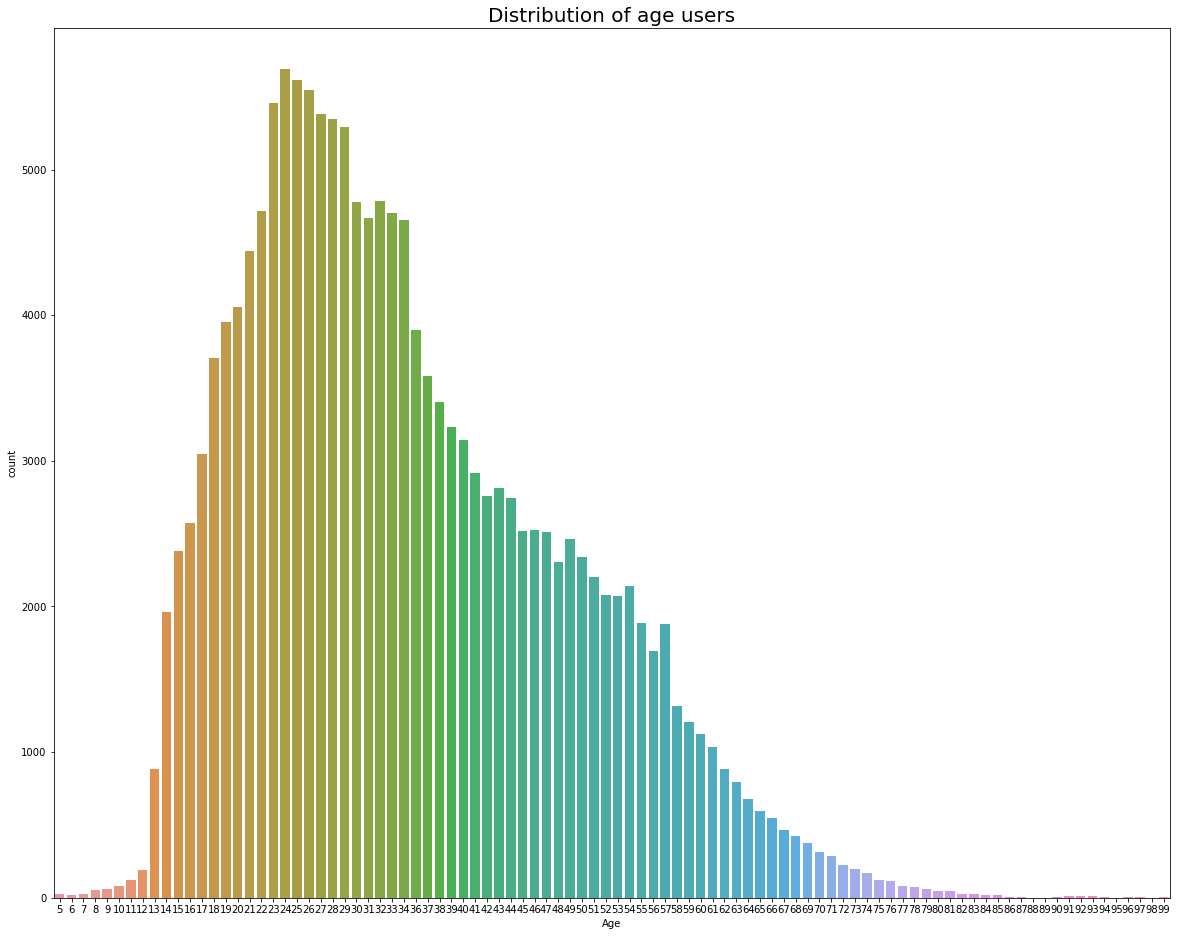

In [179]:
plt.figure(figsize=(20,16))
sns.countplot(x="Age", data=users[users.Age!=35])
plt.title("Distribution of age users", size=20)
plt.show()

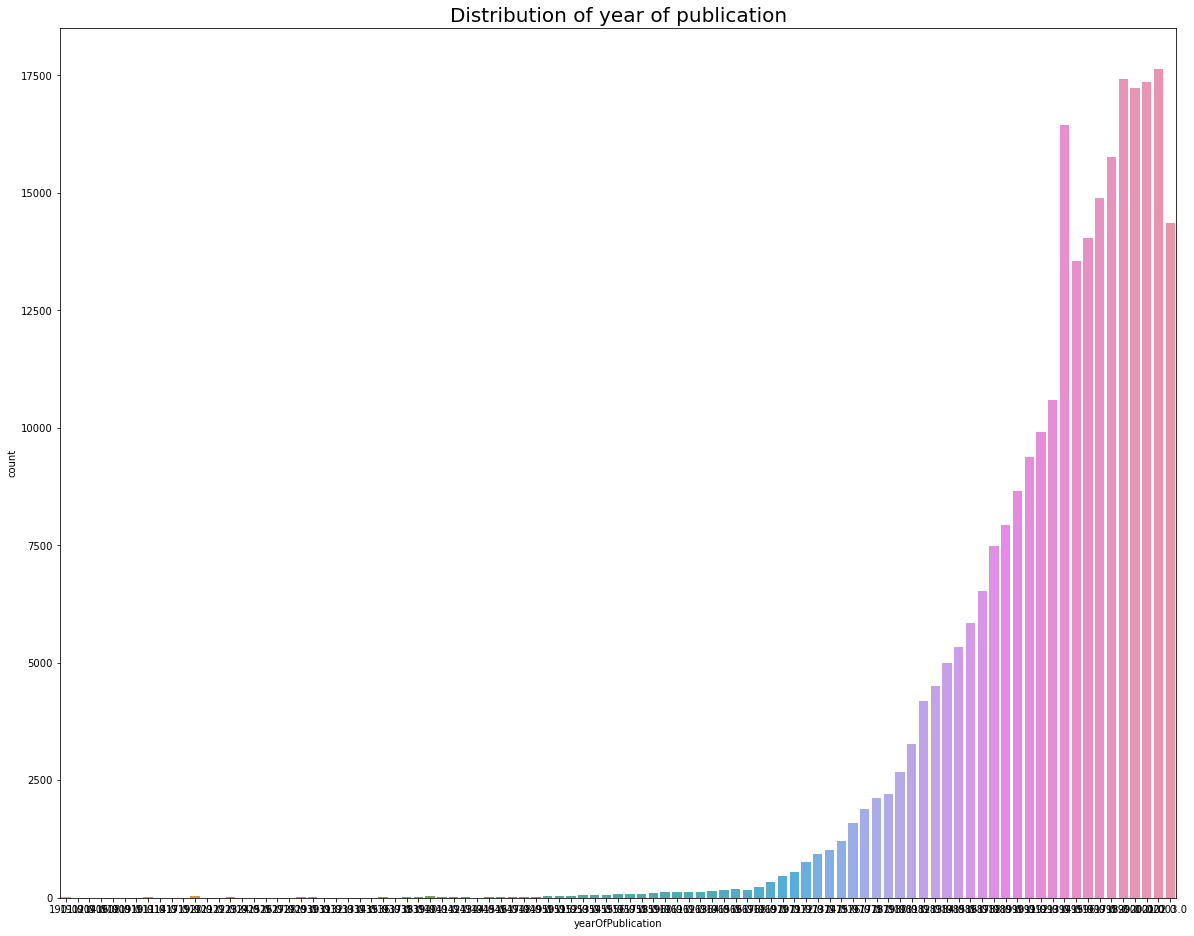

In [163]:
plt.figure(figsize=(20,16))
sns.countplot(x="yearOfPublication", data=books[(1900<books.yearOfPublication) & 
                                                ( books.yearOfPublication<2004)])
plt.title("Distribution of year of publication", size=20)
plt.show()

In [ ]:
number of author publish per year

In [164]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

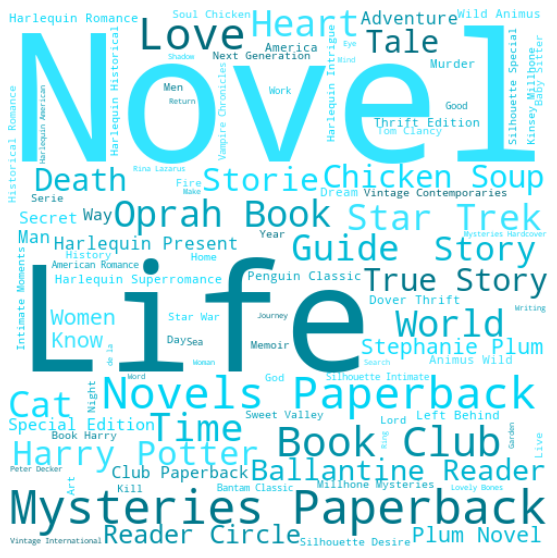

In [184]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df['bookTitle']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Recommendation system